# Table of Contents
* [1. Les bases de la dynamique des populations](#1.-Les-bases-de-la-dynamique-des-populations)
	* [1.1 La suite de Fibonacci](#1.1-La-suite-de-Fibonacci)
	* [1.2 Digression: comparer des temps d'exécution](#1.2-Digression:-comparer-des-temps-d'exécution)
	* [1.3 Modèles différentiels](#1.3-Modèles-différentiels)
	* [1.4 Croissances géométrique et exponentielle](#1.4-Croissances-géométrique-et-exponentielle)
	* [1.5 Croissance logistique](#1.5-Croissance-logistique)
	* [1.6 Modèle de Lotka-Volterra](#1.6-Modèle-de-Lotka-Volterra)


# 1. Les bases de la dynamique des populations

À voir: 

- [[Bacaer 2009](#cite-bacaer2009a)] très intéressante perspective historique
- [[Boularas et al 2009](#cite-boularas2009a)] présentation très vivante et accessible des modèles différentiels
- [[Otto et Dray2007](#cite-otto2007a)] très complet et tourné vers les biologistes

## 1.1 La suite de Fibonacci

<img src="https://upload.wikimedia.org/wikipedia/commons/3/35/Fibonacci2.jpg" alt="schema_pop" style="width: 150px;"/>
[Leonardo Fibonacci](https://en.wikipedia.org/wiki/Fibonacci) (c. 1170-c. 1250) considera en 1202 un problème de croissance de populations de lapins:

> Combien de couples de lapins obtiendrons-nous à la fin de l'année si, 
> commençant avec un couple, chacun des couples produisait chaque mois un 
> nouveau couple lequel deviendrait productif au second mois de son existence ?



Si $x_{n}$ désigne la taille de la population au mois $n$ et si on suppose que $x_{1}=x_{2}=1$, alors au troisième mois ce couple se reproduit donc $x_{3}=2$, le mois suivant le premier couple se reproduit à nouveau et le couple obtenu au mois précédent n'est pas encore productif donc $x_{4}=3$, ainsi de suite:
![suite de Fibonacci](./images/suite_fibonacci.png)
(en rouge les couples en âge de se reproduire).

À un mois $n$ donné, la population comprend tous les couples du mois $n-2$ qui se sont reproduits au mois $n-1$ donc $2\,x_{n-2}$ auxquels s'ajoutent les couples produits au mois $n-1$ qui ne sont pas en âge de se reproduire, c'est-à-dire $x_{n-1}-x_{n-2}$. Ainsi $x_{n}=2\,x_{n-2}+(x_{n-1}-x_{n-2})$ d'où la relation de récurrence:

\begin{equation}\label{eqFibonacci}
 x_{n} = x_{n-1}+x_{n-2}\,,\ x_{1}=x_{2}=1\,.
\end{equation}

Cette [suite](https://en.wikipedia.org/wiki/Fibonacci_number) dite de Fibonacci est décrite sous la forme d'un système dynamique (en temps discret), i.e. la taille de la population n'est explicitement pas donnée, seule la dynamique de croissance locale en temps l'est.
Il faudra attendre plus de cinq cent ans pour que la formule explicite de cette suite soit établie: 

\begin{equation}\label{eqFibonacciExp}
  x_{n}
  =
  \frac{(1+\sqrt{5})^n-(1-\sqrt{5})^{n}}
  {2^n\,\sqrt{5}}\,.
\end{equation}

Sur la plan de la dynamique de populations cette suite ne présente que peu d'intérêt. En effet elle croit plus vite que $n^2$ mais nettement moins vite que $2^n$ (penser aux grains de riz sur l'échiquier). Elle a plus étonnamment trouvé des applications en [architecture des plantes](https://en.wikipedia.org/wiki/Patterns_in_nature). 

On dispose de [plusieurs façons](http://stackoverflow.com/questions/494594/how-to-write-the-fibonacci-sequence-in-python) de programmer cela en Python. La version récursive n'est pas la plus efficace, la plus simple est relativement efficace:

In [1]:
import numpy as np

def fibonacci(n):
 a,b = 1,1
 for i in range(n-1):
  a,b = b,a+b
 return a

def fibonacci_explicit(n):
    return np.int(np.ceil((1+np.sqrt(5))**n-(1-np.sqrt(5))**n)
                  /(2**n*np.sqrt(5)))

def fibonacci_recursive(n):
    if n==1 or n==2:
        return 1
    return fibonacci_recursive(n-1)+fibonacci_recursive(n-2)

## 1.2 Digression: comparer des temps d'exécution

Jypiter  [permet](https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/)  de mesurer des temps d'exécution, de profiler et de débugger. Pour mesurer les temps d'exécution on fait appel aux [commandes magiques](http://nbviewer.jupyter.org/github/ipython/ipython/blob/1.x/examples/notebooks/Cell%20Magics.ipynb) comme

- `%%time` (cell magic) 
- `%timeit` (line magic) 

[voir toutes les commandes avec `%lsmagic`, trouver de l'aide avec `%%time?`].

In [2]:
%time
for n in range(1,20):
    fibonacci(n)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs


In [3]:
%time
for n in range(1,20):
    fibonacci_explicit(n)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.96 µs


In [4]:
%time
for n in range(1,20):
    fibonacci_recursive(n)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs


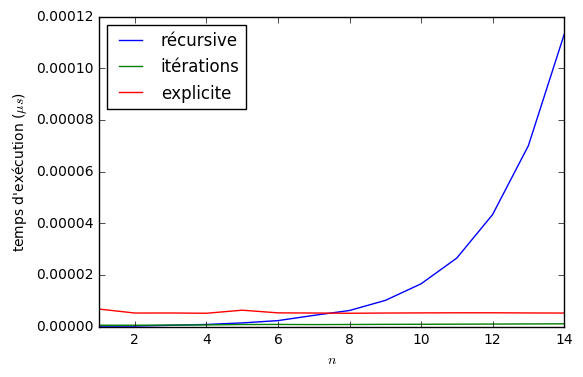

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

temps_calcul = {}
temps_calcul['itérations'] = {}
temps_calcul['explicite'] = {}
temps_calcul['récursive'] = {}
for n in range(1,15):
    result = %timeit -n 10 -q -o fibonacci(n)   
    temps_calcul['itérations'][n] = result.best
    result = %timeit -n 10 -q -o fibonacci_explicit(n)
    temps_calcul['explicite'][n] = result.best
    result = %timeit -n 10 -q -o fibonacci_recursive(n)
    temps_calcul['récursive'][n] = result.best        
for a,b in temps_calcul.items():
    plt.plot(list(b.keys()),list(b.values()))
plt.xlim(1,14)
plt.legend(list(temps_calcul.keys()), loc='upper left')
plt.ylabel(r"temps d'exécution ($\mu s$)")
plt.xlabel(r'$n$')
plt.show()

La formule explicite \eqref{eqFibonacciExp} conduit à un très mauvais algorithme puisque pour les grandes valeurs de $n$, elle fait apparaitre par exemple la différence de deux termes $(1+\sqrt{5})^n$ et $(1-\sqrt{5})^n$ qui divergent.

## 1.3 Modèles différentiels

La suite de Fibonacci n'est pas un bon modèle de population. Des modèles en temps discret on été proposés aux XVII et XVIIIe siècles.   Les premiers modèles en temps continu apparaissent au 18ème siècle.

[Daniel Bernoulli](https://en.wikipedia.org/wiki/Daniel_Bernoulli) (1700-1782) proposa une des premières études d'épidémiologie concernant l'inoculation de la variole. 
En 1760, il propose un modèle épidémiologique à l'aide d'équations différentielles et établit que, selon ce modèle, la généralisation de cette pratique permettrait de gagner un peu plus de trois ans d’espérance de vie à la naissance. La pratique a été généralisée quelques dizaines d'années plus tard par le médecin anglais Edward Jenner. C'est seulement un siècle plus tard que Louis Pasteur a clairement établi le principe d'action de la vaccination et celui du système immunitaire.

[Leonhard Euler](https://en.wikipedia.org/wiki/Leonhard_Euler) (1707-1783) décrit la croissance géométrique des populations. 

[Thomas Malthus](https://fr.wikipedia.org/wiki/Thomas_Malthus) (1766-1834) confronte la croissance géométrique de la population à la croissance arithmétique des ressources.
Il intégre ainsi population et  ressources au sein d'un même cadre. Ceci n'est toutefois pas réaliste dans la mesure où il ne tient pas entièrement compte du couplage population/ressources.

Nous voulons modéliser l'évolution de la taille d'une population mono-spécifique, c'est-à-dire supposée composée d'une seule espèce. Notons $n(t)$ la taille de cette population à l'instant $t$, il s'agit d'une quantité entière. Nous allons modéliser l'évolution de cette taille à des instants  $t_{k}$, que nous supposerons pour simplifier équirépartis, i.e. $t_{k}=k\,h$ avec $h>0$:

<img src="./images/schema_pop.png" alt="schema_pop" style="width: 450px;"/>

Modéliser l'évolution de la taille de population consiste à définir la variation $\Delta n(t_{k})$ de cette taille entre les instants $t_{k}$ et $t_{k+1}$:

$$
  n(t_{k+1})=n(t_{k})+\Delta n(t_{k})\,.
$$


On suppose donc que ces accroissements dépendent de la taille courante de la population. Il est pertinent de s'intéresse à la variation de la taille de la population par unité de temps:

$$
  \frac{n(t_{k+1})-n(t_{k})}{h}=\frac{\Delta n(t_{k})}{h}\,.
$$

On fait l'hypothèse que les instants $t_{k}$ sont rapprochés, i.e. $h$ petit.

Dans l'équation précédente on fait tendre $h$ vers 0 et $k$ vers l'infini de telle sorte que $t_{k}\to t$ pour $t$ donné. On suppose aussi que $\Delta n(t_{k})$ tend vers l'infini de telle sorte que le rapport $\Delta n(t_{k})/h$ tende vers un certain $F(n(t))$:

\begin{align}\label{eqNt}
  \dot n(t)=F(n(t))\,.
\end{align}



Enfin, *la taille $n(t)$ de la population est supposée très grande* et nous faisons le *changement* d'échelle suivant:

$$
   x(t) := \frac{n(t)}{M}
$$

Ce changement de variable peut s'interpréter de différentes façons. Par exemple pour une population de bactéries:

- $M$ peut être vu comme l'inverse de la masse d'une bactérie, alors $x(t)$ désigne la *{biomasse}* de la population; 
- $M$ peut être le *volume* dans lequel vit cette population, $x(t)$ est alors une *densité* de population; 
- $M$ peut être simplement un *changement d'échelle*, si la taille de la population est de l'ordre de $10^{9}$ individus et si $M=10^{3}$ alors $x(t)$ désignera la taille de la population de méta-individus (1 méta-individu = $10^3$ individus). 




L'équation \eqref{eqNt}
 devient:

$$
  \frac{\dot n(t)}{M}=\frac{1}{M}\,F\Bigl(M\,\frac{n(t)}{M}\Bigr)
$$

et en posant $f(x) := \frac{1}{M}\,F(M\,x)$ on obtient l'équation différentielle ordinaire (EDO):

$$
  \dot x(t)=f(x(t))\,,\ x(0)=x_{0}
$$

et son état $x(t)$ peut donc désigner la *taille* d'une population, sa *biomasse*, sa *densité* (nombre d'individus par unité de volume), ou bien encore sa *concentration* (massique ou molaire); pour simplifier nous dirons que $x(t)$ ``est'' la population; $x_{0}$ désigne la population initiale, supposée connue.



Dans beaucoup d'exemple $f$ est de la forme:

$$
 f(x)=r(x)\,x
$$

où $r(x)$ s'interprète comme un *taux de croissance per capita* (par individu). En effet si $x(t+h)=x(t)+f(x(t))$ ($h=1$ unité de temps) et si par exemple $f(x(t))=5$  il y alors eu un accroissement de 5 individus (dans l'échelle $x$) sur la période de temps $h$: est-ce grand ou petit ? Cela est relatif à la taille $x(t)$ de la population, c'est donc le rapport $\frac{f(x(t))}{x(t)}=r(x(t))$ qui importe.

## 1.4 Croissances géométrique et exponentielle

La première étape consiste à appréhender la croissance géométique (temps discret) et exponentielle (temps continu).

On considère une population dont la taille évolue de la façon suivante:

$$
  n(t_{k+1}) 
  = n(t_{k})
  +\lambda\,n(t_{k})\,h
  -\mu\,n(t_{k})\,h
$$

où $\lambda$ est le taux de naissance et $\mu$ celui de mort. Il est nécessaire 
ici que l'intervalle de temps $[t_{k},t_{k+1}]$ soit suffisamment petit pour que 
$n(t_{k})$ évolue peu, mais aussi suffisamment grand pour que des 
événements de naissance et mort surviennent. Après changement d'échelle, 
l'équation précédente devient:

$$
   \dot x(t) = (\lambda-\mu)\,x(t)\,,\ x(0)=x_0
$$

taux de naissance $\lambda>0$, taux de mort $\mu>0$.

qui admet la solution explicite suivante:

$$
  x(t) = x_{0}\,e^{(\lambda-\mu)\,t}\,,\quad t\geq 0\,.
$$

In [6]:
population = lambda t: x0*np.exp((rb-rd)*t)

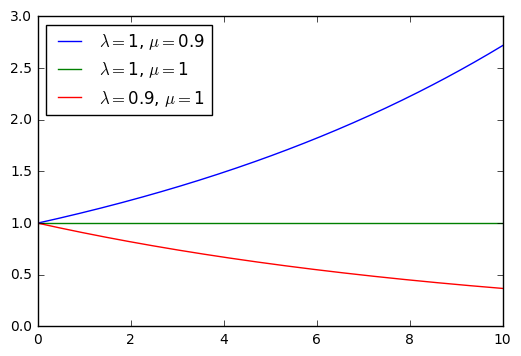

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

t0, t1 = 0, 10
temps = np.linspace(t0,t1,200, endpoint=True)

legende = []
for x0, rb, rd in zip([1, 1, 1], [1, 1, 0.9], [0.9, 1, 1]):
    plt.plot(temps, population(temps))
    legende = legende + [r'$\lambda=$'+str(rb)+r', $\mu=$'+str(rd),]
plt.legend(legende, loc='upper left')
plt.show()

Ainsi 

- lorsque $\mu>\lambda$ la population croît exponentiellement
- lorsque $\lambda<\mu$ la population tend exponentiellement vers 0. 

On parlera de croissance (ou décroissance) malthusienne. 

Lorsque  $\lambda<\mu$ la population décroît exponentiellement vite vers 0 mais à tout instant fini cette population est strictement positive, pourtant si $M=10^3$ et si $x(t)$ descend en dessous de $10^{-3}$ alors $x(t)$ représentera moins d'un individu. Ce point n'est pas cohérent avec l'hypothèse de population grande et donc limite l'intérêt de ce modèle pour les petites tailles de population.

## 1.5 Croissance logistique

En 1838,
 [Pierre François Verhulst](https://en.wikipedia.org/wiki/Pierre_Francois_Verhulst) (1804-1849)
 proposa un modèle de croissance  dont le taux de croissance diminue linéairement en fonction de la taille de la population rendant ainsi compte de la capacité maximale d'accueil du milieu.


$$
  \dot x(t) = r\,\left(1-\frac{x(t)}{K}\right)\,x(t)\,,\ x(0)=x_0
$$

admet l'unique solution:

$$
  x(t) =  K \,\frac{1}{1+\left(\frac {K}{x_{0}} - 1\right) \,e^{-r\,t}}\,.
$$

In [8]:
population = lambda t: K*1/(1+ (K/x0-1) * np.exp(-r*t))

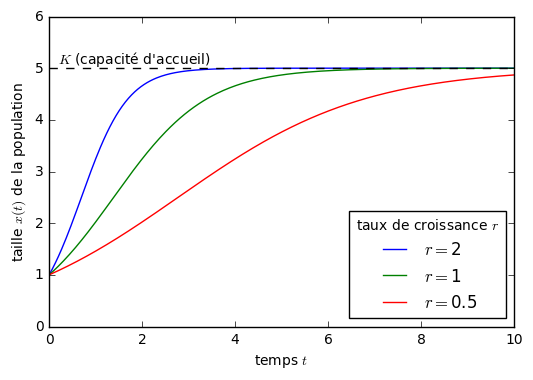

In [9]:
t0, t1 = 0, 10

temps = np.linspace(t0,t1,300, endpoint=True)

x0, K = 1, 5
legende = []
for r in [2, 1, 0.5]:
    plt.plot(temps, population(temps))
    legende = legende + [r'$r=$'+str(r),]    
plt.ylim([0,K*1.2])
plt.legend(legende, loc='lower right',title=r'taux de croissance $r$')
plt.plot([t0, t1], [K, K], color="k", linestyle='--')
plt.text((t1-t0)/50, K, r"$K$ (capacité d'accueil)", 
         verticalalignment='bottom', horizontalalignment='left')
plt.xlabel(r'temps $t$')
plt.ylabel(r'taille $x(t)$ de la population')
plt.show()

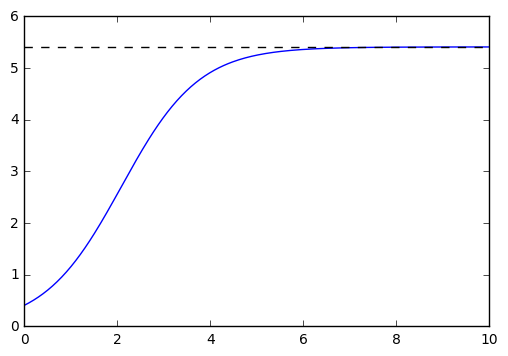

In [10]:
from IPython.html.widgets import interact, fixed

def pltlogistique(x0,K,r):
    population2 = K*1/(1+ (K/x0-1) * np.exp(-r*temps))
    plt.plot(temps, population2)
    plt.ylim([0,6])
    plt.plot([t0, t1], [K, K], color="k", linestyle='--')
    plt.show()
    
interact(pltlogistique, x0=(0.01,6,0.1), K=(0.01,6,0.1), r=(0.1,20,0.1))
plt.show()

## 1.6 Modèle de Lotka-Volterra

Le [modèle de Lotka-Volterra](https://fr.wikipedia.org/wiki/Équations_de_Lotka-Volterra) représente deux populations en interaction, des proies, de taille $x_1(t)$, ayant accès à une ressource ilimitée (non modélisée) et des prédateurs, de taille $x_2(t)$, se nourissant de proies. En l'absence de prédateurs, la population de proies croit de façon exponentielle selon un taux $r_1$; en l'abscence de proies, la population de prédateurs décroit de façon exponentielle selon un taux $r_2$.
On suppose que $r_1$ dépend de $x_2(t)$ et que $r_2$ dépend de $x_1(t)$: 

- $r_1=a-b\,x_2(t)$, où $a$ est le taux de naissance des proies en l'absence de prédateurs et $b\,x_2(t)$ est le taux de prédation que l'on suppose linéaire en $x_2(t);

- $r_2=c-d\,x_1(t)$, où $c$ est le taux de mort des prédateurs en l'absence de proies et $d\,x_1(t)$ est le taux de naissance des prédateurs que l'on suppose linéaire en $x_1(t)$.

On obtient donc un système de deux équations différentielles couplées:

\begin{align*}
\dot x_1(t) &= [a-b\,x_2(t)]\,x_1(t) \\
\dot x_2(t) &= - [c-d\,x_1(t)]\,x_2(t)
\end{align*}

ce système n'admet pas de solution explicites, on doit faire appel à une méthode numérique.

Voir par exemple dans le [SciPy Cookbook](http://scipy-cookbook.readthedocs.io/items/LoktaVolterraTutorial.html).

Le module `integrate` de [SciPy](https://www.scipy.org) propose deux outils pour [intégrer numériquement des EDO](https://en.wikipedia.org/wiki/Numerical_methods_for_ordinary_differential_equations?oldid=550976985): `integrate.odeint` et `integrate.ode`. 

- `integrate.odeint` est une fonction implémentant le solveur LSODA d'ODEPACK qui bascule automatiquement entre une méthode de prédiction-correction d'Adam Adams pour des problèmes non-raides à une méthode BDF pour les problèmes raides.

- `integrate.ode` est une classe offrant une interface orientée objet donnant accès à plusieurs solveurs.

`integrate.ode` est plus flexible mais `integrate.odeint` est nettement plus accessible. Nous nous limiterons ici à ce dernier solveur.
La fonction `odeint` comprend 3 arguments obligatoires : une fonction définissant le membre de droit de l'EDO, i.e. la fonction $f$,  un array donnant la condition initiale, est un array de valeurs de $t$ où $x(t)$ doit être calculé.  La fonction du membre de droite comprends 2 arguments obligatoires, un array $x$ et un scalaire  $t$, et des arguments optionnels.

Voir [[Johansson 2015 p. 223](#cite-johansson2015a)].

In [25]:
from scipy.integrate import odeint

help(odeint)

Help on function odeint in module scipy.integrate.odepack:

odeint(func, y0, t, args=(), Dfun=None, col_deriv=0, full_output=0, ml=None, mu=None, rtol=None, atol=None, tcrit=None, h0=0.0, hmax=0.0, hmin=0.0, ixpr=0, mxstep=0, mxhnil=0, mxordn=12, mxords=5, printmessg=0)
    Integrate a system of ordinary differential equations.
    
    Solve a system of ordinary differential equations using lsoda from the
    FORTRAN library odepack.
    
    Solves the initial value problem for stiff or non-stiff systems
    of first order ode-s::
    
        dy/dt = func(y, t0, ...)
    
    where y can be a vector.
    
    *Note*: The first two arguments of ``func(y, t0, ...)`` are in the
    opposite order of the arguments in the system definition function used
    by the `scipy.integrate.ode` class.
    
    Parameters
    ----------
    func : callable(y, t0, ...)
        Computes the derivative of y at t0.
    y0 : array
        Initial condition on y (can be a vector).
    t : array
        

In [23]:
a, b, c, d = 0.4, 0.002, 0.001, 0.7
def f(x, t):
    x1, x2 = x
    return [a * x1 - b * x1 * x2, 
            c * x1 * x2 - d * x2]

x0 = [600, 400]
t = np.linspace(0, 50, 250)
x_t = odeint(f, x0, t)

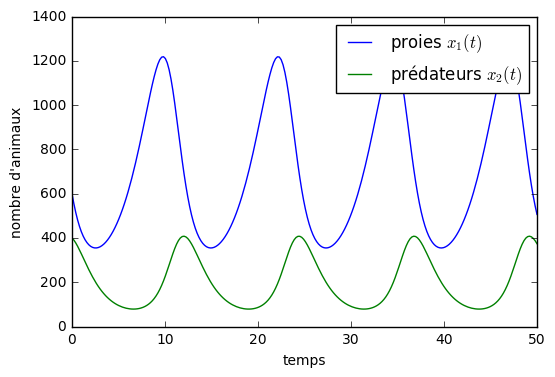

In [12]:
plt.plot(t, x_t[:,0], label=r"proies $x_1(t)$")
plt.plot(t, x_t[:,1], label=r"prédateurs $x_2(t)$")
plt.xlabel("temps")
plt.ylabel("nombre d'animaux")
plt.legend()
plt.show()

### Espace des phases

Au lieu de tracer $t\to x_1(t)$ et $t\to x_2(t)$, on tracer les points $(x_1(t),x_2(t))$ lorsque $t$ varie, donc le temps n'apparait plus, il s'agit d'une courbe dans l'[espace des phases](https://fr.wikipedia.org/wiki/Espace_des_phases).

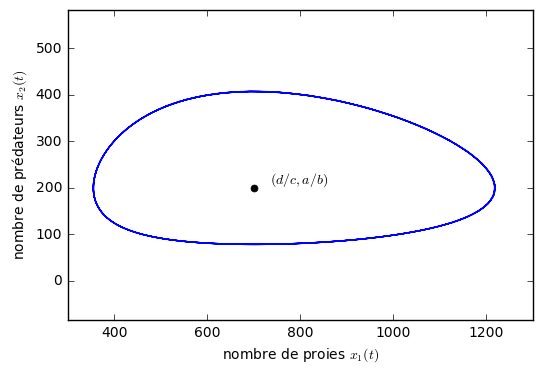

In [20]:
plt.plot(x_t[:,0], x_t[:,1])
plt.xlabel(r"nombre de proies $x_1(t)$")
plt.ylabel(r"nombre de prédateurs $x_2(t)$")
marker_style = dict(linestyle=':', markersize=10)
equilibre = [d/c,a/b]
plt.plot(equilibre[0], equilibre[1], marker='.', **marker_style, color="k")
plt.text(1.05*equilibre[0], 1.05*equilibre[1], r'$(d/c,a/b)$')
plt.axis('equal')
plt.xlim(300, 1300)
plt.ylim(0, 500)
plt.show()

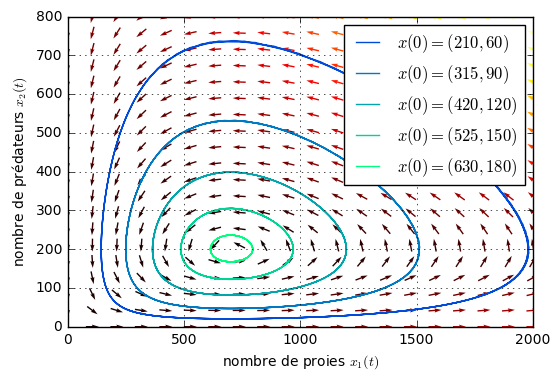

In [22]:
echelle  = np.linspace(0.3, 0.9, 5)
couleurs = plt.cm.winter(np.linspace(0.3, 1., len(echelle)))

for v, col in zip(echelle, couleurs):
    val_ini = np.multiply(v,equilibre)
    X = odeint( f, val_ini, t)
    plt.plot( X[:,0], X[:,1], lw=1, color=col, 
             label=r'$x(0)=(%.f, %.f)$' % tuple(val_ini) )

x1max = plt.xlim(xmin=0)[1]
x2max = plt.ylim(ymin=0)[1]

nb_points = 20

x1 = np.linspace(0, x1max, nb_points)
x2 = np.linspace(0, x2max, nb_points)
X1 , X2  = np.meshgrid(x1, x2)
DX1, DX2 = f([X1, X2],0)
vecteurs = np.hypot(DX1, DX2)     # norme du taux de croissance
vecteurs[ vecteurs == 0] = 1.     # éviter la division par 0
DX1 /= vecteurs                   # normalisation de chaque vecteur
DX2 /= vecteurs

plt.quiver(X1, X2, DX1, DX2, vecteurs, pivot='mid', cmap=plt.cm.hot)
plt.xlabel(r"nombre de proies $x_1(t)$")
plt.ylabel(r"nombre de prédateurs $x_2(t)$")
plt.legend()
plt.grid()
plt.xlim(0, x1max)
plt.ylim(0, x2max)
plt.show()

<!--bibtex

@book{bacaer2009a,
	Author = {Nicolas Baca{\"e}r},
	Publisher = {Editions Cassini},
	Title = {Histoires de math{\'e}matiques et de populations},
	Year = {2009}}
 
@book{boularas2009a,
	Author = {Driss Boularas and Daniel Fredon and Daniel Petit},
	Publisher = {Dunod},
	Title = {Mini Manuel de Mathématiques pour les sciences de la vie et de l'environnement},
	Year = {2009}}


@book{johansson2015a,
	Author = {Robert Johansson},
	Publisher = {Apress},
	Title = {Numerical Python. A Practical Techniques Approach for Industry},
	Year = {2015}}

@book{otto2007a,
	Author = {Otto, Sarah P. and Day, Troy},
	Date-Added = {2009-11-29 20:19:32 +0100},
	Date-Modified = {2009-11-29 20:20:05 +0100},
	Publisher = {Princeton University Press},
	Title = {A Biologist's Guide to Mathematical Modeling in Ecology and Evolution},
	Year = {2007},
	Bdsk-Url-1 = {http://www.amazon.com/exec/obidos/redirect?tag=citeulike07-20&path=ASIN/0691123446}}

-->


# References

<a name="cite-bacaer2009a"/><sup>[^](#ref-1) </sup>Nicolas Baca&euml;r. 2009. _Histoires de math&eacute;matiques et de populations_.

<a name="cite-boularas2009a"/><sup>[^](#ref-2) </sup>Driss Boularas and Daniel Fredon and Daniel Petit. 2009. _Mini Manuel de Mathématiques pour les sciences de la vie et de l'environnement_.

<a name="cite-otto2007a"/><sup>[^](#ref-3) </sup>Otto, Sarah P. and Day, Troy. 2007. _A Biologist's Guide to Mathematical Modeling in Ecology and Evolution_.

